Lending Club Loan Data Analysis

Project 1

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

    credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

    purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

    int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

    installment: The monthly installments owed by the borrower if the loan is funded.

    log.annual.inc: The natural log of the self-reported annual income of the borrower.

    dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

    fico: The FICO credit score of the borrower.

    days.with.cr.line: The number of days the borrower has had a credit line.

    revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

    revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

    inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

    delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

    pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

    Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

    You will check the correlation between features and will drop those features which have a strong correlation

    This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

    After applying EDA and feature engineering, you are now ready to build the predictive models

    In this part, you will create a deep learning model using Keras with Tensorflow backend

To download the datasets click here -


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')
# display dataset
df=pd.DataFrame(df)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
df.shape

(9578, 14)

In [4]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df=pd.get_dummies(df)
df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_all_other  purpose_credit_card  \
0        0               0                  0                    0   
1        0               0                  0                    1   
2        0               0                  0                    0   
3        0               0                  0                    0   
4        0               0                  0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           1                    0                         0   
1                           0                    0                         0   
2                           1                    0                         0   
3                           1                    0                         0   
4                           0                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

In [7]:
df.shape

(9578, 20)

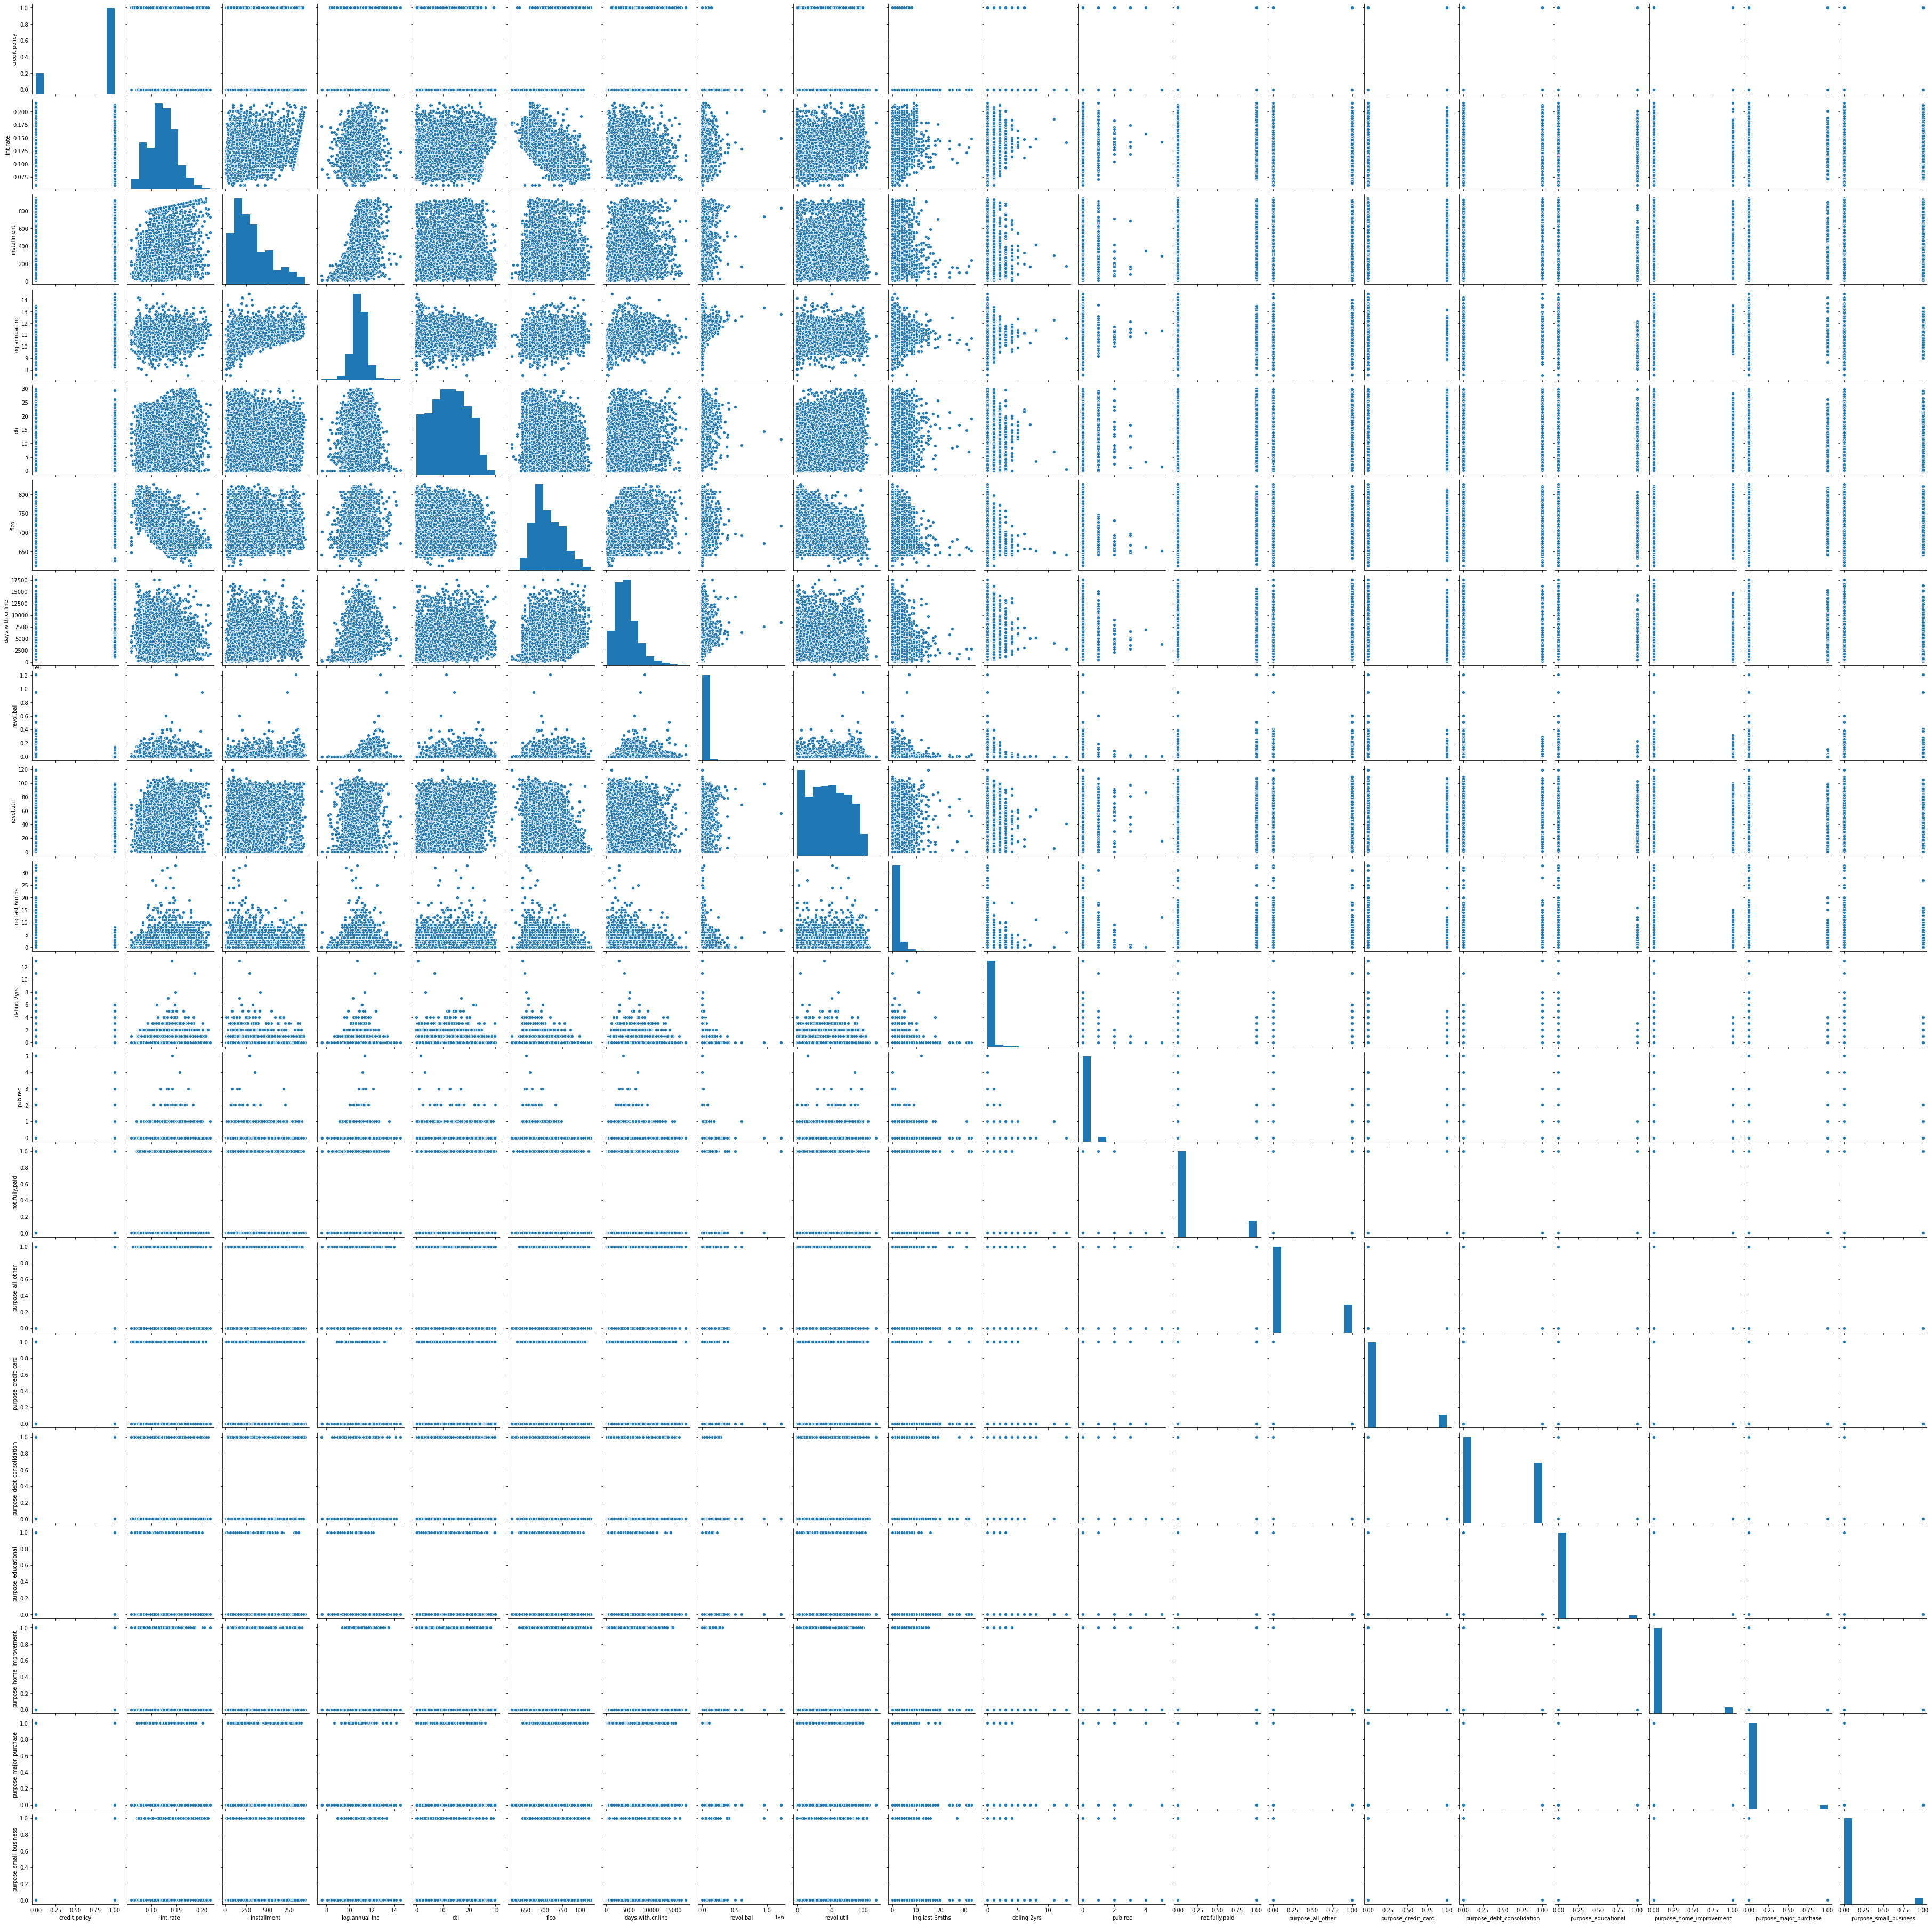

In [12]:
sns.pairplot(df)

In [17]:
sns.pairplot(df,hue="not.fully.paid", diag_kind="hist")

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [11]:
X=df.drop('not.fully.paid', axis=1)
y=df['not.fully.paid']
X.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_all_other  purpose_credit_card  \
0        0                  0                    0   
1        0                  0                    1   
2        0                  0                    0   
3        0                  0                    0   
4        0                  0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           1                    0                         0   
1                           0                    0                         0   
2                           1                    0                         0   
3                           1                    0                         0   
4                           0                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

In [12]:
X.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [35]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

/usr/local/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('loan_data.csv')

In [13]:
# find feature importance
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(X,y)
gb.fit(X,y)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.13532946 0.14770075 0.12379772 0.09288589 0.04137102 0.07060717
 0.06332297 0.06846037 0.05879795 0.09534637 0.00544708 0.02150638
 0.00320771 0.01053743 0.0142198  0.00099023 0.00344089 0.0020665
 0.04096429]
[0.01457214 0.10247656 0.11509341 0.10942187 0.107577   0.07811709
 0.1112263  0.11257475 0.11231657 0.05394066 0.01449501 0.00892659
 0.01238001 0.0070173  0.01272746 0.00608857 0.0072543  0.00460259
 0.0091918 ]


In [14]:
# Using important features
X=df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.bal',
      'revol.util','inq.last.6mths']]
X.head()


credit.policy  int.rate  installment  log.annual.inc    dti  \
0              1    0.1189       829.10       11.350407  19.48   
1              1    0.1071       228.22       11.082143  14.29   
2              1    0.1357       366.86       10.373491  11.63   
3              1    0.1008       162.34       11.350407   8.10   
4              1    0.1426       102.92       11.299732  14.97   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  
0        5639.958333      28854        52.1               0  
1        2760.000000      33623        76.7               0  
2        4710.000000       3511        25.6               1  
3        2699.958333      33667        73.2               1  
4        4066.000000       4740        39.5               0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

Build The Graph

In [16]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((9,),input_shape=(9,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))#sigmoid because the output values is 0 or 1. 
#the probability approximates according to threshold

In [63]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.3)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
''''EPOCHS = 50
checkpoint_filepath = '/home/labuser'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    save_freq="epoch",
    mode='max',
    save_best_only=True)'''



Train The Model

In [66]:
''''# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),epochs=EPOCHS, batch_size=32, callbacks=[model_checkpoint_callback])'''


model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32)

Epoch 1/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2944 - accuracy: 0.8846 - val_loss: 0.5398 - val_accuracy: 0.8121
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2962 - accuracy: 0.8768 - val_loss: 0.5498 - val_accuracy: 0.8205
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2915 - accuracy: 0.8795 - val_loss: 0.5578 - val_accuracy: 0.8032
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2873 - accuracy: 0.8778 - val_loss: 0.5689 - val_accuracy: 0.8225
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.8838 - val_loss: 0.5812 - val_accuracy: 0.8132
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.8806 - val_loss: 0.5816 - val_accuracy: 0.7944
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2925 - accuracy: 0.8815 - val_loss: 0.5881 - val_accuracy: 0.8074
Epoch 

In [41]:
model.save('mnist_dnn_v1.h5')

In [ ]:
''''# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)
''''

Rough

In [ ]:
tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    **kwargs
)
